<a href="https://colab.research.google.com/github/IshaSarangi/Edureka_Notes/blob/main/Stock_price_prediction_using_RNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1ivoyTRawGRZmIfJAk3-YrfsRDkJVnw19?usp=sharing

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#Read Data
data = pd.read_csv('/content/Tesla.csv - Tesla.csv.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [51]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB
None


In [52]:
#Convert into datetime
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [53]:
print(data)

           Date        Open        High         Low       Close    Volume  \
0    2010-06-29   19.000000   25.000000   17.540001   23.889999  18766300   
1    2010-06-30   25.790001   30.420000   23.299999   23.830000  17187100   
2    2010-07-01   25.000000   25.920000   20.270000   21.959999   8218800   
3    2010-07-02   23.000000   23.100000   18.709999   19.200001   5139800   
4    2010-07-06   20.000000   20.000000   15.830000   16.110001   6866900   
...         ...         ...         ...         ...         ...       ...   
1687 2017-03-13  244.820007  246.850006  242.779999  246.169998   3010700   
1688 2017-03-14  246.110001  258.119995  246.020004  258.000000   7575500   
1689 2017-03-15  257.000000  261.000000  254.270004  255.729996   4816600   
1690 2017-03-16  262.399994  265.750000  259.059998  262.049988   7100400   
1691 2017-03-17  264.000000  265.329987  261.200012  261.500000   6475900   

       Adj Close  
0      23.889999  
1      23.830000  
2      21.959999  

In [54]:
#Train Test Split in sequential data
len_data = len(data)
split_ratio = 0.8
len_train = int(len_data*split_ratio)
len_validation = len_data - len_train
print(len_train)
print(len_validation)

1353
339


In [55]:
train_data = data[:len_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.info()
print(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1353 non-null   datetime64[ns]
 1   Open    1353 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.3 KB
           Date        Open
0    2010-06-29   19.000000
1    2010-06-30   25.790001
2    2010-07-01   25.000000
3    2010-07-02   23.000000
4    2010-07-06   20.000000
...         ...         ...
1348 2015-11-04  227.000000
1349 2015-11-05  230.580002
1350 2015-11-06  230.699997
1351 2015-11-09  232.990005
1352 2015-11-10  223.479996

[1353 rows x 2 columns]


In [56]:
#Slicing validation data from DF and create new DF for validation set
validation_data = data[len_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data.info()
print(validation_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 1353 to 1691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    339 non-null    datetime64[ns]
 1   Open    339 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.4 KB
           Date        Open
1353 2015-11-11  217.770004
1354 2015-11-12  217.850006
1355 2015-11-13  212.949997
1356 2015-11-16  206.089996
1357 2015-11-17  215.199997
...         ...         ...
1687 2017-03-13  244.820007
1688 2017-03-14  246.110001
1689 2017-03-15  257.000000
1690 2017-03-16  262.399994
1691 2017-03-17  264.000000

[339 rows x 2 columns]


In [57]:
#Converting to Numpy array
train_set = train_data['Open'].values
print(train_set.shape)
#Changing shape of train_set
train_set = train_set.reshape(-1,1)
print(train_set.shape)

(1353,)
(1353, 1)


In [58]:
#Scaling Numerical Data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set = sc.fit_transform(train_set)
print(train_set)

[[0.01053291]
 [0.03553936]
 [0.03262991]
 ...
 [0.79018888]
 [0.7986226 ]
 [0.76359882]]


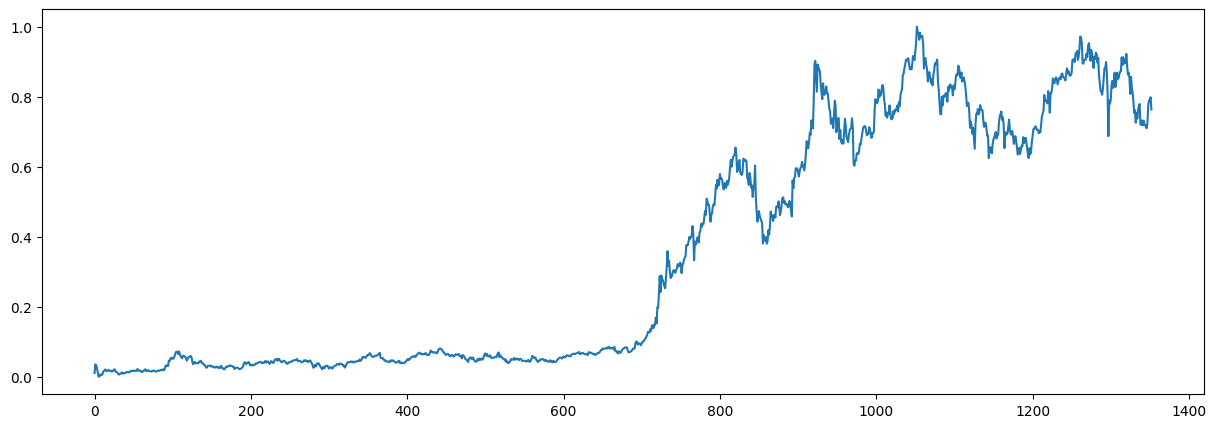

In [59]:
#Visualize the Train set series
plt.figure(figsize=(15,5))
plt.plot(train_set)
plt.show()

In [60]:
#Converting to x_train and y_train
x_train = []
y_train = []
for i in range(50,len_train):
  x_train.append(train_set[i-50:i,0])
  y_train.append(train_set[i,0])

In [61]:
#Convert it to Numpy
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1303, 50)
(1303,)


In [62]:
#Final reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1303, 50, 1)


In [63]:
print(x_train[0])

[[0.01053291]
 [0.03553936]
 [0.03262991]
 [0.02526425]
 [0.01421574]
 [0.00095754]
 [0.        ]
 [0.00530328]
 [0.00666594]
 [0.00460354]
 [0.00662911]
 [0.01399478]
 [0.01679373]
 [0.01926123]
 [0.02102899]
 [0.01664641]
 [0.01605716]
 [0.01859832]
 [0.01973999]
 [0.01756712]
 [0.0162413 ]
 [0.01705153]
 [0.01495231]
 [0.01605716]
 [0.01789858]
 [0.02139727]
 [0.01988731]
 [0.01458403]
 [0.01384746]
 [0.01292675]
 [0.00939123]
 [0.0061135 ]
 [0.00751299]
 [0.00850735]
 [0.01038559]
 [0.01270578]
 [0.00883881]
 [0.00924392]
 [0.01086436]
 [0.01145362]
 [0.01112216]
 [0.01381063]
 [0.01329503]
 [0.0131109 ]
 [0.01296358]
 [0.01281627]
 [0.0155784 ]
 [0.01741981]
 [0.01646228]
 [0.01664641]]


In [64]:
print(y_train[0])

0.017898577503111683


In [65]:
#Build the RNN

from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, BatchNormalization

model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=1,activation='tanh'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [67]:
history=model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 7.5107e-04 - loss: 0.2032
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 4.7384e-04 - loss: 0.0710
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 1.1391e-04 - loss: 0.0371
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 1.7772e-04 - loss: 0.0204
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.0012 - loss: 0.0163
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0015 - loss: 0.0160
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0014 - loss: 0.0119
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.0014 - loss: 0.0126
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 3.5211e-04 - loss: 0.0094
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.0032 - loss: 0.0103
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 5.4310e-04 - loss: 0.0099
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 

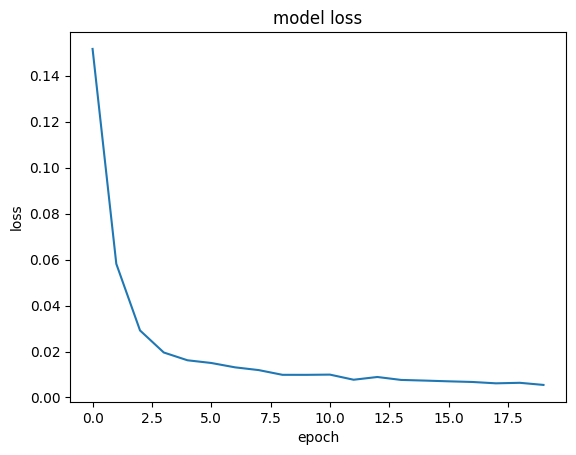

In [68]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

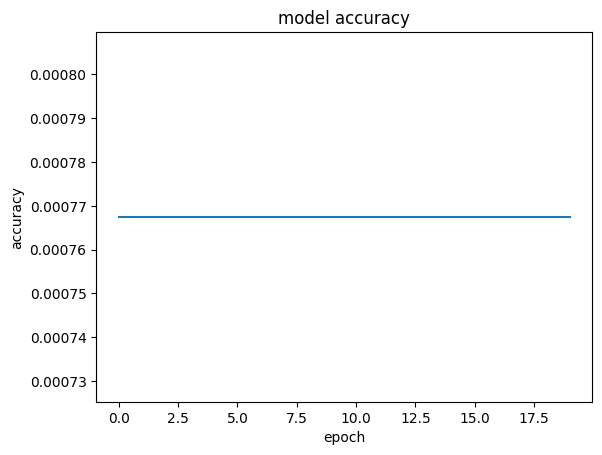

In [69]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [70]:
y_pred=model.predict(x_train)
y_pred=sc.inverse_transform(y_pred)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [71]:
y_train=sc.inverse_transform(y_train.reshape(-1,1))

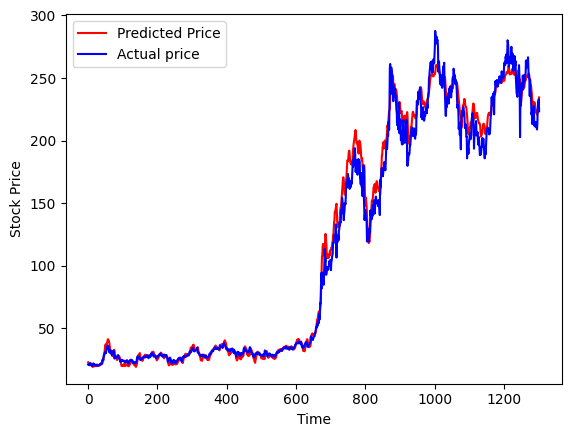

In [72]:
plt.plot(y_pred,color='red',label='Predicted Price')
plt.plot(y_train,color='blue',label='Actual price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Build LSTM

In [73]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [75]:
y_train=sc.fit_transform(y_train)

In [76]:
history = model_lstm.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 6.7667e-04 - loss: 0.0632
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.0016 - loss: 0.0017
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0033 - loss: 0.0013
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 8.6040e-04 - loss: 0.0011
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.0016 - loss: 0.0014
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.0012 - loss: 0.0011
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.0026 - loss: 0.0010
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.0017 - loss: 0.0011
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.0019 - loss: 0.0010
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.0014 - loss: 9.8978e-04
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 7.3119e-04 - loss: 9.4496e-04
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 3

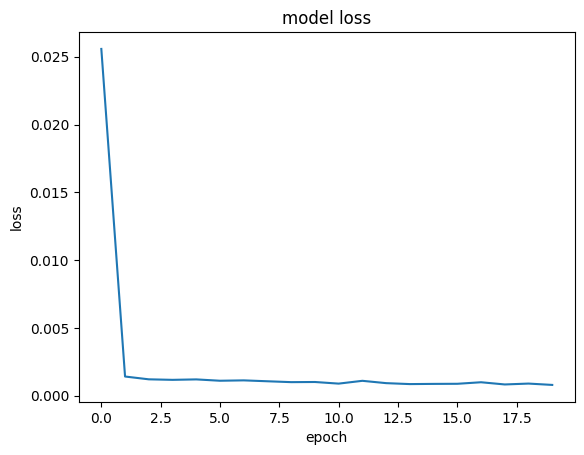

In [77]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

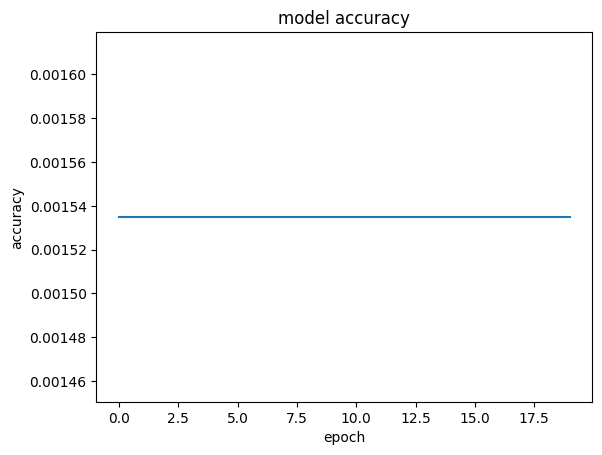

In [78]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [79]:
x_input=data.iloc[-50:].Open.values
x_input=x_input.reshape(-1,1)
x_input=sc.transform(x_input)

In [80]:
rnn_output = sc.inverse_transform(model.predict(x_input.reshape(-1, 50, 1)))
lstm_output = sc.inverse_transform(model_lstm.predict(x_input.reshape(-1, 50, 1)))
print("Next values of RNN: ")
print(rnn_output[0,0])
print("Next values of LSTM: ")
print(lstm_output[0,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Next values of RNN: 
251.07977
Next values of LSTM: 
258.0765
